In [1]:
import torch
import torch.nn as nn
import nltk
from torch.utils.data import Dataset, DataLoader

device = "cuda" if torch.cuda.is_available() else "cpu"
## vesuale and sense 
from tqdm.auto import tqdm
from timeit import default_timer as timer
### my setup
from func import preprocess_words_fn ,train_fn ,accuracy_fn
from classes import createChatDataset
from model import chatModel , chatModel_v2 ,chatModel_v3, chatModel_v3_extended


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\University\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\University\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\University\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\University\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\University\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\University\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwo

In [2]:
### load the dataset
# Load the file with weights_only=False if you trust the source
print("start loading the dataset")
train_dataset = torch.load("train_dataset_v2.pt", weights_only=False)
print("data set loaded")

start loading the dataset
data set loaded


In [3]:
classNames = train_dataset.classes
train_dataset.classes , len(train_dataset.classes)

(['greeting',
  'goodbye',
  'practical_programs',
  'study_AI',
  'study_tips',
  'best_study_time',
  'student_support'],
 7)

In [4]:
epochs = 450
BATCH_SIZE = 32  ## 1, 2, 8 ,16 , 32 , 64
learning_rate = 0.001
hidden_size = 32
input_feature = len(train_dataset[0][0]) # for single sample
out_feature = len(train_dataset.classes)
print(input_feature, out_feature)

495 7


In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_dataLoader = DataLoader( dataset = train_dataset,
                              batch_size = BATCH_SIZE,
                              shuffle=True)

In [6]:
model_1 = chatModel_v3(input_feature=input_feature , hidden_feature=hidden_size
                 , out_feature=out_feature)
criterion = loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),
                             lr = learning_rate)


### train the model

In [7]:
torch.manual_seed(42)
startime = timer()
prnt = True
bar = tqdm( total = int(epochs//100) , desc = "training")
print("the training is started")
lossList, accList = [] , []
for epoch in range(epochs+1) : 
    losslist , acclist = train_fn(model=model_1, data_loader = train_dataLoader, optimizer=optimizer,
             loss_fn=loss_fn, accuracy_fn= accuracy_fn, device=device , prnt=prnt)
    lossList.append(losslist)
    accList.append(acclist)
    if (epoch%50 == 0 ) | (epoch == 1000):
        bar.update(1)
        print(epoch+1)
        prnt = True
    else:
        prnt = False

endtime =timer()
print(f"total training time : {endtime-startime} sec")

training:   0%|          | 0/4 [00:00<?, ?it/s]

the training is started
Model training loss: 1.94121 | Model accuracy: 18.03%
1
Model training loss: 1.81287 | Model accuracy: 31.78%
51
Model training loss: 0.15950 | Model accuracy: 95.96%
101
Model training loss: 0.06225 | Model accuracy: 97.98%
151
Model training loss: 0.03852 | Model accuracy: 98.12%
201
Model training loss: 0.03099 | Model accuracy: 99.38%
251
Model training loss: 0.01192 | Model accuracy: 100.00%
301
Model training loss: 0.02341 | Model accuracy: 99.38%
351
Model training loss: 0.00547 | Model accuracy: 100.00%
401
Model training loss: 0.01868 | Model accuracy: 99.38%
451
total training time : 9.60137659998145 sec


In [12]:
torch.save(model_1, "modelv3e.pt")

In [9]:
import numpy as np
print(type(lossList[0]))
print(lossList[:5])
lossList_np =  lossList
print(type(lossList[0]) ,len(accList), len(lossList), lossList_np[:6] , accList[0], type(accList) )

<class 'float'>
[1.941214680671692, 1.8128670930862427, 1.6629584550857544, 1.613396453857422, 1.5618216037750243]
<class 'float'> 451 451 [1.941214680671692, 1.8128670930862427, 1.6629584550857544, 1.613396453857422, 1.5618216037750243, 1.4402677536010742] 18.028846153846153 <class 'list'>


451


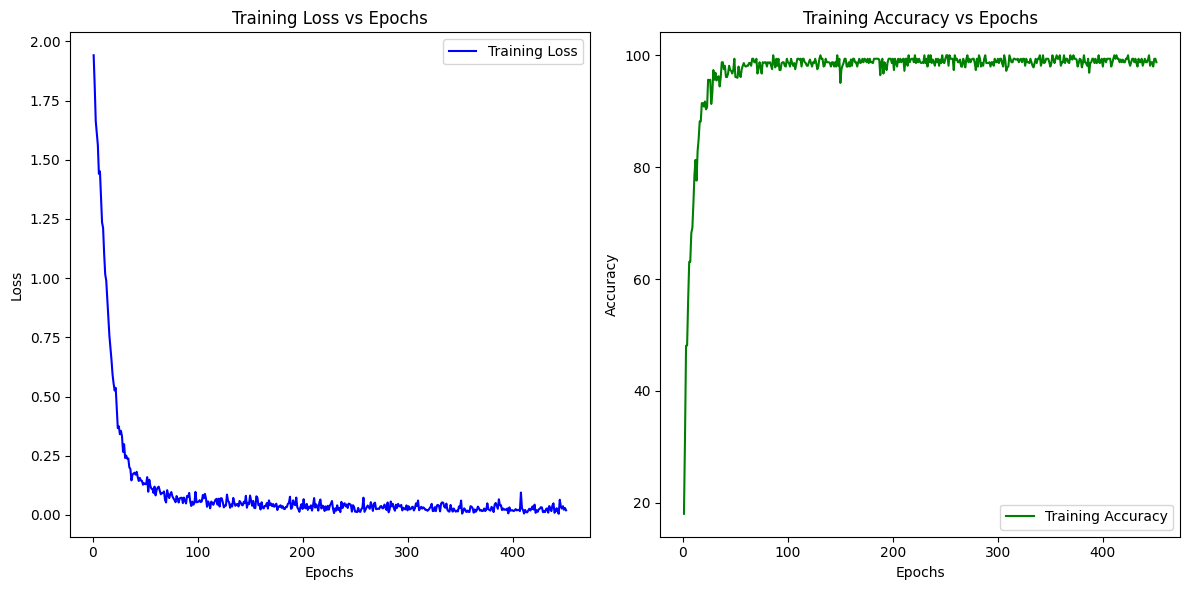

In [10]:
import matplotlib.pyplot as plt


# lossList and accList are lists of PyTorch tensors
# Detach the tensors and convert to NumPy arrays
# Convert the list of tensors to NumPy arrays
# lossList_np = [loss.detach().cpu().numpy() for loss in lossList]
print(len(lossList_np))
accList =  accList


epochs = range(1, len(lossList_np) + 1)  # Create an epoch range based on the length of the lists

# Plotting Loss vs Epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Two plots in one row
plt.plot(epochs, lossList_np, label='Training Loss', color='blue')
plt.title('Training Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy vs Epochs
plt.subplot(1, 2, 2)  # Two plots in one row
plt.plot(epochs, accList, label='Training Accuracy', color='green')
plt.title('Training Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # To make sure the plots don't overlap
plt.show()


torch.Size([495])
['greeting', 'goodbye', 'practical_programs', 'study_AI', 'study_tips', 'best_study_time', 'student_support'] 7
Confusion Matrix:
tensor([[1, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 2, 0, 0, 0],
        [0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1]])


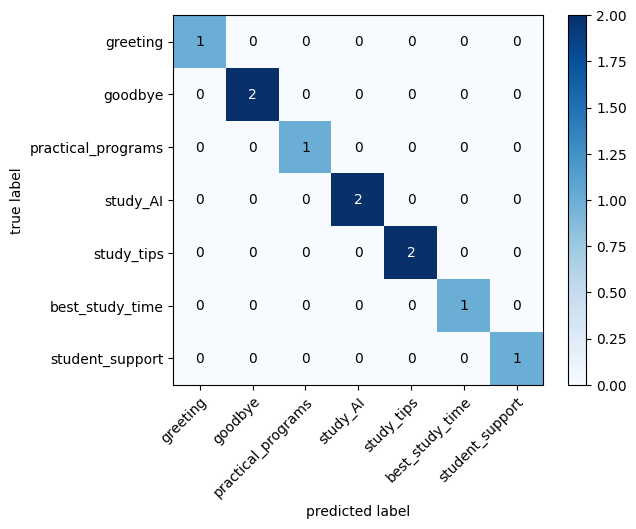

In [11]:
import random
import torch
import matplotlib.pyplot as plt
from torchmetrics import ConfusionMatrix
import mlxtend
from mlxtend.plotting import plot_confusion_matrix

# Sample selection from train_dataset
sentSamples, sentSampleLabels = [], []
for sample, label in random.sample(list(train_dataset), k=10):  # k number of samples
    sentSamples.append(sample)
    sentSampleLabels.append(label)

# Convert sentSampleLabels to tensor
sentSampleLabels = torch.tensor(sentSampleLabels)

# Check the shape of the first sample
print(sentSamples[0].shape)

prediction = []

# Set model to evaluation mode and use inference mode for predictions
model_1.eval()
with torch.inference_mode():
    for sample in sentSamples:
        # Ensure the sample is a 2D tensor with batch dimension (e.g., [1, feature_size])
        pred_out = model_1.predict(sample.unsqueeze(0))  # Adding batch dimension
        prediction.append(pred_out)

# Stack predictions (class labels)
pred_result = torch.stack(prediction)

# Convert predictions to class indices (if they are logits or probabilities)
pred_result = pred_result.squeeze(1)  # Removing extra dimension if needed
pred_result = pred_result.int()  # Ensure the predictions are integer labels

# Define class names (ensure this list matches the number of classes in the dataset)
class_names = train_dataset.classes
print(class_names, len(class_names))

# Initialize the ConfusionMatrix for multiclass classification
conf_matrix = ConfusionMatrix(task="multiclass", num_classes=len(class_names))

# Update the confusion matrix with predictions and labels
conf_matrix.update(pred_result, sentSampleLabels)

# Compute the confusion matrix
confMat = conf_matrix.compute()

print("Confusion Matrix:")
print(confMat)

# Optional: Plot confusion matrix using mlxtend
fig, ax = plot_confusion_matrix(conf_mat=confMat.numpy(), 
                                show_absolute=True, 
                                show_normed=False,
                                colorbar=True,
                                class_names=class_names)  # Add class names here

# Show the plot (if running in a Jupyter notebook or similar)
plt.show()


### get the prediction data

In [13]:
from func import bag_of_words

In [16]:

import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
queries = [
    "Any tips to stay focused while studying?"
]


bag = bag_of_words(sentence=queries[0] ,all_words=train_dataset.all_words,
                       preprocess_words_fn= preprocess_words_fn,punctuation=punctuation,
                       stop_words=stop_words)
bag_tensor= torch.tensor(bag, dtype = torch.float32).unsqueeze(0)
prediction = model_1.predict(bag_tensor)  # Replace with your prediction function
print(f"Query: {queries[0]} | Predicted Tag: {prediction}")



Query: Any tips to stay focused while studying? | Predicted Tag: tensor([4])


In [17]:
tags=train_dataset.classes

In [18]:
# Assuming the model output is `tensor([6])`
predicted_index = prediction.item()  # Extract the scalar value from the tensor
predicted_tag = tags[predicted_index]  # Map the index to the tag name

print(f"Query: {queries[0]} | Predicted Tag: {predicted_tag}")


Query: Any tips to stay focused while studying? | Predicted Tag: study_tips


In [ ]:
# train_dataset.all_words